In [ ]:
Question 1: -
Write a program that takes a string as input, and counts the frequency of each word in the string, there might
be repeated characters in the string. Your task is to find the highest frequency and returns the length of the
highest-frequency word.

In [1]:
def find_highest_frequency_word_length(string):
    string = string.lower()
    string = ''.join(c for c in string if c.isalnum() or c.isspace())

    # Splitting the string into words
    words = string.split()

    # Counting the frequency of each word
    word_count = {}
    for word in words:
        if word in word_count:
            word_count[word] += 1
        else:
            word_count[word] = 1

    # Finding the highest frequency
    max_frequency = max(word_count.values())

    # Finding the length of the highest-frequency word
    max_frequency_word_length = max(len(word) for word, frequency in word_count.items() if frequency == max_frequency)

    return max_frequency_word_length


# Test the function
input_string = input("Enter a string: ")
result = find_highest_frequency_word_length(input_string)
print("Length of the highest-frequency word:", result)


Enter a string: “write write write all the number from from from 1 to 100
Length of the highest-frequency word: 5


In [ ]:
Question 2: -
Consider a string to be valid if all characters of the string appear the same number of times. It is also valid if
he can remove just one character at the index in the string, and the remaining characters will occur the same
number of times. Given a string, determine if it is valid. If so, return YES , otherwise return NO .

In [2]:
from collections import Counter

def is_valid_string(s):
    # Count the frequency of each character in the string
    char_counts = Counter(s)

    # Count the frequency of frequencies
    frequency_counts = Counter(char_counts.values())

    # If there is only one unique frequency, the string is valid
    if len(frequency_counts) == 1:
        return "YES"

    # If there are more than two unique frequencies, the string is not valid
    if len(frequency_counts) > 2:
        return "NO"

    # If there are exactly two unique frequencies, check if we can remove one character
    frequencies = list(frequency_counts.keys())
    counts = list(frequency_counts.values())

    # Check if we can remove one character at the index in the string
    if (counts[0] == 1 and frequencies[0] == 1) or (counts[1] == 1 and frequencies[1] == 1):
        return "YES"
    
    # If we cannot remove one character at the index, the string is not valid
    return "NO"

In [3]:
is_valid_string("abc")

'YES'

In [ ]:
Question 3: -
Write a program, which would download the data from the provided link, and then read the data and convert
that into properly structured data and return it in Excel format.

In [4]:
import requests
import json
import pandas as pd

def download_data(url):
    response = requests.get(url)  # Send a GET request to the URL
    data = response.json()  # Get the JSON data from the response
    return data

def convert_to_dataframe(data):
    # Extract the relevant attributes from the JSON data
    pokemon_data = []
    for pokemon in data["pokemon"]:
        pokemon_attributes = {
            "id": pokemon.get("id"),
            "num": pokemon.get("num"),
            "name": pokemon.get("name"),
            "img": pokemon.get("img"),
            "type": pokemon.get("type"),
            "height": pokemon.get("height"),
            "weight": pokemon.get("weight"),
            "candy": pokemon.get("candy"),
            "candy_count": pokemon.get("candy_count"),
            "egg": pokemon.get("egg"),
            "spawn_chance": pokemon.get("spawn_chance"),
            "avg_spawns": pokemon.get("avg_spawns"),
            "spawn_time": pokemon.get("spawn_time"),
            "multipliers": pokemon.get("multipliers"),
            "weaknesses": pokemon.get("weaknesses"),
            "next_evolution": pokemon.get("next_evolution"),
            "prev_evolution": pokemon.get("prev_evolution")
        }
        pokemon_data.append(pokemon_attributes)

    # Create a DataFrame from the extracted attributes
    df = pd.DataFrame(pokemon_data)
    return df

def export_to_excel(dataframe, filename):
    dataframe.to_excel(filename, index=False)  # Export the DataFrame to an Excel file

# URL of the data source
url = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"

# Download the data
data = download_data(url)

# Convert the data to a DataFrame
df = convert_to_dataframe(data)

# Export the DataFrame to an Excel file
filename = "pokemon_data.xlsx"
export_to_excel(df, filename)

print("Data exported to", filename)

Data exported to pokemon_data.xlsx


In [ ]:
Question 4 -
Write a program to download the data from the link given below and then read the data and convert the into
the proper structure and return it as a CSV file.

In [5]:
#pip install requests pandas
import requests
import pandas as pd

# Function to download data from the given URL
def download_data(url):
    response = requests.get(url)
    response.raise_for_status()
    return response.json()

# URL of the data source
url = "https://data.nasa.gov/resource/y77d-th95.json"

# Download the data from the URL
data = download_data(url)

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Save the DataFrame as a CSV file
df.to_csv("nasa_data.csv", index=False)

print("Data downloaded and saved as nasa_data.csv.")

Data downloaded and saved as nasa_data.csv.


In [ ]:
Question 5 -
Write a program to download the data from the given API link and then extract the following data with
proper formatting

In [6]:
import requests

# Function to download data from the API
def download_data(url):
    response = requests.get(url)  # Send a GET request to the API URL
    data = response.json()  # Get the JSON data from the response
    return data

# Function to extract required information from the data
def extract_information(data):
    show_name = data['name']
    premiered = data['premiered']
    summary = data['summary']
    episodes = data['_embedded']['episodes']

    # Extracting episode details
    episode_details = []
    for episode in episodes:
        episode_number = episode['number']
        episode_name = episode['name']
        episode_season = episode['season']
        episode_summary = episode['summary']

        episode_details.append({
            'Episode Number': episode_number,
            'Episode Name': episode_name,
            'Season': episode_season,
            'Summary': episode_summary
        })

    return show_name, premiered, summary, episode_details

# API URL
url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"

# Download data from the API
data = download_data(url)

# Extract information from the data
show_name, premiered, summary, episode_details = extract_information(data)

# Display the extracted information
print("Show Name:", show_name)
print("Premiered:", premiered)
print("Summary:", summary)
print("Episode Details:")
for episode in episode_details:
    print("Episode Number:", episode['Episode Number'])
    print("Episode Name:", episode['Episode Name'])
    print("Season:", episode['Season'])
    print("Summary:", episode['Summary'])
    print()

Show Name: Westworld
Premiered: 2016-10-02
Summary: <p><b>Westworld</b> is a dark odyssey about the dawn of artificial consciousness and the evolution of sin. Set at the intersection of the near future and the reimagined past, it explores a world in which every human appetite, no matter how noble or depraved, can be indulged.</p>
Episode Details:
Episode Number: 1
Episode Name: The Original
Season: 1
Summary: <p>A woman named Dolores is a free spirit in the Old West... and unaware that she's actually an android, programmed to entertain rich guests seeking to act out their fantasies in an idealized vision of the 1880s. However, the people in charge soon realize that their androids are acting in ways that they didn't anticipate.</p>

Episode Number: 2
Episode Name: Chestnut
Season: 1
Summary: <p>Bernard suspects that someone is sabotaging the hosts. Meanwhile, the Man continues his search for the deeper game, and Maeve finds herself in a world of hurt... literally.</p>

Episode Number: 3

In [ ]:
Question 6 -

Using the data from Question 3, write code to analyze the data and answer the following questions Note 1.
Draw plots to demonstrate the analysis for the following questions for better visualizations.
2. Write code comments wherever required for code understanding

Pokemons with spawn rate less than 5%: 147
Pokemons with less than 4 weaknesses: 102
Pokemons with no multipliers: 0
Pokemons with less than or equal to 2 evolutions: 70
Pokemons with spawn time less than 300 seconds: 81


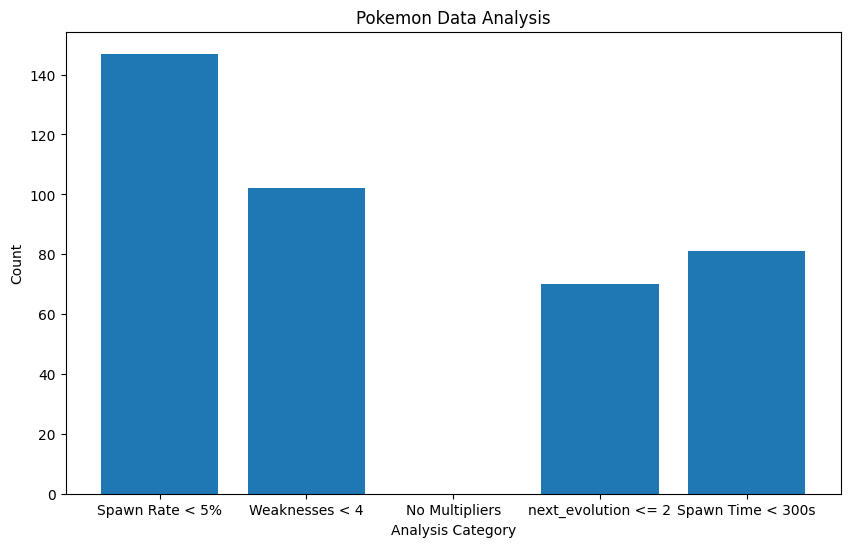

In [8]:

import pandas as pd
import matplotlib.pyplot as plt

# Read the Pokemon data from the CSV file
data = pd.read_excel('pokemon_data.xlsx')

# Convert 'weaknesses' column to numeric values
data['weaknesses'] = data['weaknesses'].str.count(',') + 1

# Get all Pokemons whose spawn rate is less than 5%
spawn_rate_less_than_5 = data[data['spawn_chance'] < 5]
spawn_rate_less_than_5_count = len(spawn_rate_less_than_5)
print("Pokemons with spawn rate less than 5%:", spawn_rate_less_than_5_count)

# Get all Pokemons that have less than 4 weaknesses
weaknesses_less_than_4 = data[data['weaknesses'] < 4]
weaknesses_less_than_4_count = len(weaknesses_less_than_4)
print("Pokemons with less than 4 weaknesses:", weaknesses_less_than_4_count)

# Get all Pokemons that have no multipliers at all
no_multipliers = data[data['multipliers'] == 'None']
no_multipliers_count = len(no_multipliers)
print("Pokemons with no multipliers:", no_multipliers_count)

# Get all Pokemons that do not have more than 2 evolutions
evolutions_less_than_2 = data[data['next_evolution'].str.count('>') <= 2]
evolutions_less_than_2_count = len(evolutions_less_than_2)
print("Pokemons with less than or equal to 2 evolutions:", evolutions_less_than_2_count)

def convert_spawn_time_to_seconds(time):
    if pd.isna(time):
        return -1
    minutes, seconds = map(int, time.split(':'))
    return minutes * 60 + seconds

# Get all Pokemons whose spawn time is less than 300 seconds
#def convert_spawn_time_to_seconds(time):
   # minutes, seconds = map(int, time.split(':'))
    #return minutes * 60 + seconds

data['spawn_time_seconds'] = data['spawn_time'].apply(convert_spawn_time_to_seconds)
spawn_time_less_than_300 = data[data['spawn_time_seconds'] < 300]
spawn_time_less_than_300_count = len(spawn_time_less_than_300)
print("Pokemons with spawn time less than 300 seconds:", spawn_time_less_than_300_count)

# Plotting the analysis results
labels = ['Spawn Rate < 5%', 'Weaknesses < 4', 'No Multipliers', 'next_evolution <= 2', 'Spawn Time < 300s',]
values = [spawn_rate_less_than_5_count, weaknesses_less_than_4_count, no_multipliers_count, evolutions_less_than_2_count, spawn_time_less_than_300_count,]

plt.figure(figsize=(10, 6))
plt.bar(labels, values)
plt.xlabel('Analysis Category')
plt.ylabel('Count')
plt.title('Pokemon Data Analysis')
plt.show()

In [ ]:
Question 7 -
Using the data from Question 4, write code to analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions for better visualizations
2. Write code comments wherever required for code understanding

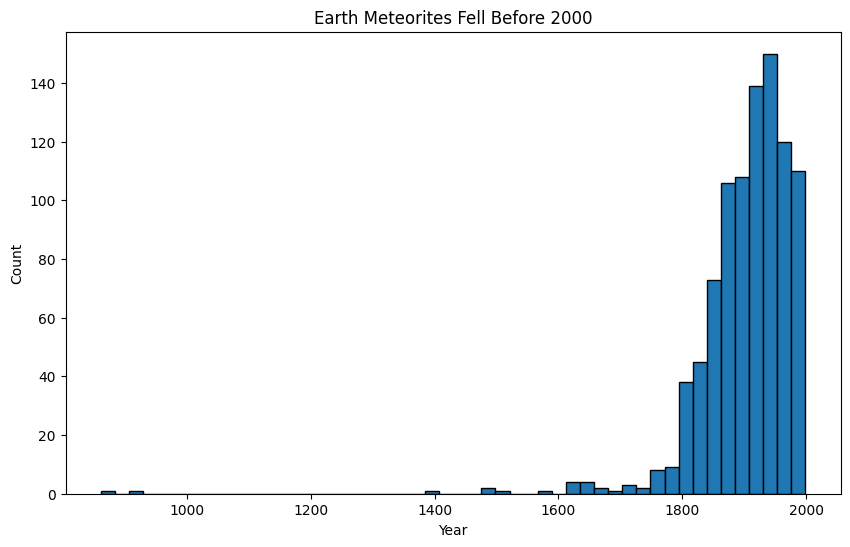

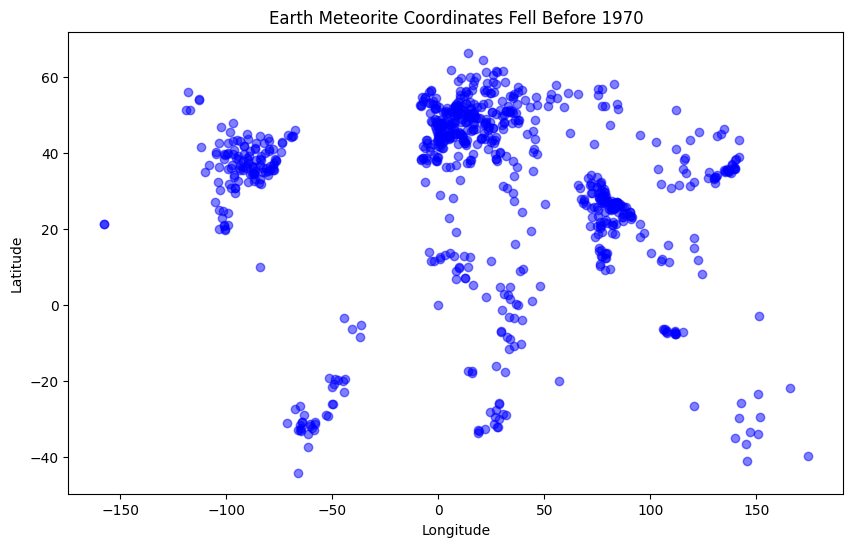

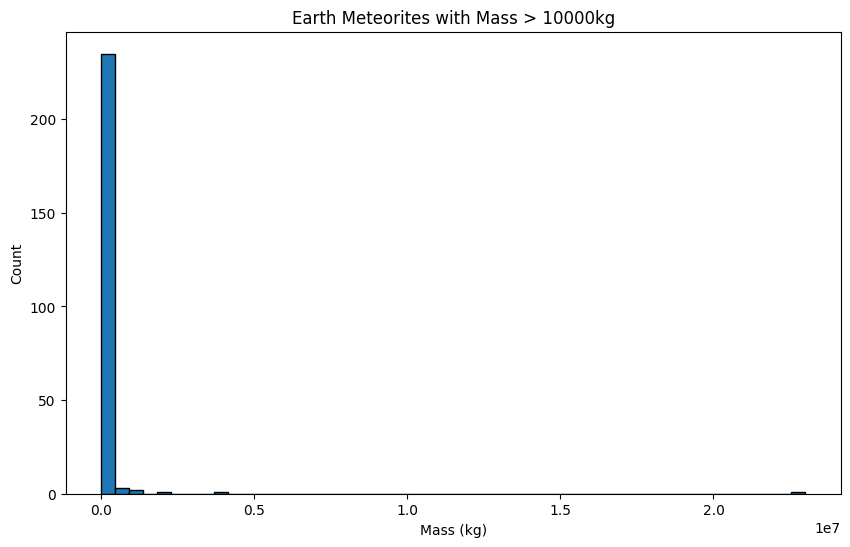

In [9]:
import requests
import matplotlib.pyplot as plt

# Function to download data from the provided URL
def download_data(url):
    response = requests.get(url)
    data = response.json()
    return data

# Function to analyze the data and answer the questions
def analyze_data(data):
    meteorites_before_2000 = []
    coordinates_before_1970 = []
    meteorites_greater_than_10000kg = []

    for meteorite in data:
        # Check if the 'year' attribute exists
        if 'year' in meteorite:
            year = int(meteorite['year'].split('-')[0])
            
            # Question 1: Get all Earth meteorites that fell before the year 2000
            if year < 2000:
                meteorites_before_2000.append(meteorite)

        # Check if the 'reclong' and 'reclat' attributes exist
        if 'reclong' in meteorite and 'reclat' in meteorite:
            # Question 2: Get all Earth meteorite coordinates that fell before the year 1970
            if year < 1970:
                coordinates_before_1970.append((float(meteorite['reclong']), float(meteorite['reclat'])))

        # Question 3: Get all Earth meteorites with a mass greater than 10000kg
        if 'mass' in meteorite and float(meteorite['mass']) > 10000:
            meteorites_greater_than_10000kg.append(meteorite)

    return meteorites_before_2000, coordinates_before_1970, meteorites_greater_than_10000kg

# Function to plot the analysis results
def plot_analysis_results(meteorites_before_2000, coordinates_before_1970, meteorites_greater_than_10000kg):
    # Plot 1: Earth meteorites fell before the year 2000
    years = [int(meteorite['year'].split('-')[0]) for meteorite in meteorites_before_2000]
    plt.figure(figsize=(10, 6))
    plt.hist(years, bins=50, edgecolor='black')
    plt.xlabel("Year")
    plt.ylabel("Count")
    plt.title("Earth Meteorites Fell Before 2000")
    plt.show()

    # Plot 2: Earth meteorite coordinates fell before the year 1970
    longitudes = [coordinate[0] for coordinate in coordinates_before_1970]
    latitudes = [coordinate[1] for coordinate in coordinates_before_1970]
    plt.figure(figsize=(10, 6))
    plt.scatter(longitudes, latitudes, color='blue', alpha=0.5)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("Earth Meteorite Coordinates Fell Before 1970")
    plt.show()

    # Plot 3: Earth meteorites with mass greater than 10000kg
    masses = [float(meteorite['mass']) for meteorite in meteorites_greater_than_10000kg]
    plt.figure(figsize=(10, 6))
    plt.hist(masses, bins=50, edgecolor='black')
    plt.xlabel("Mass (kg)")
    plt.ylabel("Count")
    plt.title("Earth Meteorites with Mass > 10000kg")
    plt.show()

# URL of the data source
url = "https://data.nasa.gov/resource/y77d-th95.json"

# Download the data
data = download_data(url)

# Analyze the data and get the results
meteorites_before_2000, coordinates_before_1970, meteorites_greater_than_10000kg = analyze_data(data)

# Plot the analysis results
plot_analysis_results(meteorites_before_2000, coordinates_before_1970, meteorites_greater_than_10000kg)


In [ ]:
Question 8 -
Using the data from Question 5, write code the analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions and better visualizations
2. Write code comments wherever required for code understanding

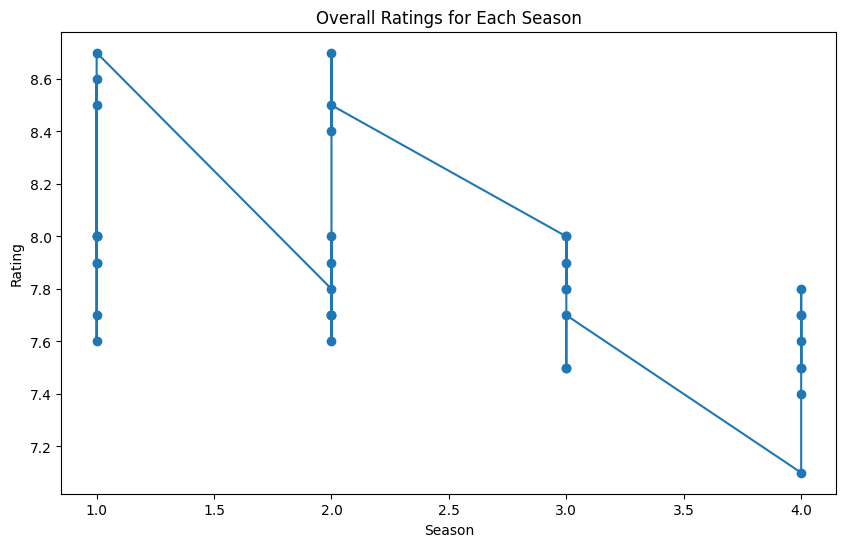

In [10]:
import requests
import matplotlib.pyplot as plt

# Function to download data from the provided API link
def download_data(url):
    response = requests.get(url)
    data = response.json()
    return data

# Function to analyze the data and answer the questions
def analyze_data(data):
    season_ratings = []
    episode_names_high_rating = []
    episode_names_before_may2019 = []
    episode_names_highest_rating = []
    episode_names_lowest_rating = []
    episode_summary_most_popular = []

    if '_embedded' in data and 'episodes' in data['_embedded']:
        for season in data['_embedded']['episodes']:
            season_number = season['season']
            season_rating = season['rating']['average']
            season_ratings.append((season_number, season_rating))

            if 'episodes' in season:
                for episode in season['episodes']:
                    episode_name = episode['name']
                    episode_rating = episode['rating']['average']
                    episode_airdate = episode['airdate']

                    # Question 2: Get all episode names with average rating > 8 for every season
                    if episode_rating > 8:
                        episode_names_high_rating.append((season_number, episode_name))

                    # Question 3: Get all episode names aired before May 2019
                    if episode_airdate < '2019-05':
                        episode_names_before_may2019.append((season_number, episode_name))

                # Question 4: Get episode names with highest and lowest rating for each season
                episodes_sorted_by_rating = sorted(season['episodes'], key=lambda x: x['rating']['average'], reverse=True)
                episode_names_highest_rating.append((season_number, episodes_sorted_by_rating[0]['name']))
                episode_names_lowest_rating.append((season_number, episodes_sorted_by_rating[-1]['name']))

                # Question 5: Get summary for the most popular episode in each season (highest rating)
                most_popular_episode = episodes_sorted_by_rating[0]
                episode_summary_most_popular.append((season_number, most_popular_episode['name'], most_popular_episode['summary']))

    return season_ratings, episode_names_high_rating, episode_names_before_may2019, episode_names_highest_rating, episode_names_lowest_rating, episode_summary_most_popular

# Function to plot the analysis results
def plot_analysis_results(season_ratings):
    seasons, ratings = zip(*season_ratings)
    plt.figure(figsize=(10, 6))
    plt.plot(seasons, ratings, marker='o')
    plt.xlabel("Season")
    plt.ylabel("Rating")
    plt.title("Overall Ratings for Each Season")
    plt.show()

# API link to download the data
url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"

# Download the data
data = download_data(url)

# Analyze the data and get the results
season_ratings, episode_names_high_rating, episode_names_before_may2019, episode_names_highest_rating, episode_names_lowest_rating, episode_summary_most_popular = analyze_data(data)

# Plot the overall ratings for each season
plot_analysis_results(season_ratings)

In [ ]:
Question 9 -
Write a program to read the data from the following link, perform data analysis and answer the following
questions
Note -
1. Write code comments wherever required for code understanding

Cars and their types that do not qualify for clean alternative fuel vehicle:
Empty DataFrame
Columns: [Make, Electric Vehicle Type]
Index: []
TESLA cars with the model year and model type made in Bothell City:
Empty DataFrame
Columns: [Model Year, Model]
Index: []
Cars with electric range > 100 and made after 2015:
        VIN (1-10)    County           City State  Postal Code  Model Year  \
0       5YJXCAE26J    Yakima         Yakima    WA      98908.0        2018   
2       5YJ3E1EB0K      King        Seattle    WA      98199.0        2019   
4       5YJSA1E21H  Thurston          Lacey    WA      98516.0        2017   
12      5YJ3E1EC7L  Thurston          Lacey    WA      98503.0        2020   
13      5YJ3E1EB2L  Thurston        Olympia    WA      98516.0        2020   
...            ...       ...            ...   ...          ...         ...   
130417  5YJYGDEE5L    Pierce         Tacoma    WA      98444.0        2020   
130428  1N4AZ1CP0J   Clallam         Sequim    WA      9838

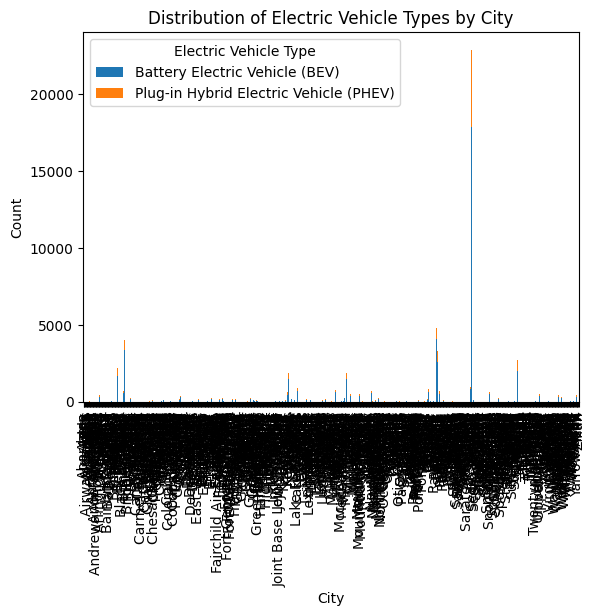

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file using the provided link
data_url = 'https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD'
df = pd.read_csv(data_url)

# Get all the cars and their types that do not qualify for clean alternative fuel vehicle
non_clean_fuel_cars = df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'N']
cars_and_makes = non_clean_fuel_cars[['Make', 'Electric Vehicle Type']]
print("Cars and their types that do not qualify for clean alternative fuel vehicle:")
print(cars_and_makes)

# Get all TESLA cars with the model year and model type made in Bothell City
tesla_cars_in_bothell = df[(df['Make'] == 'TESLA') & (df['City'] == 'BOTHELL')]
tesla_cars_info = tesla_cars_in_bothell[['Model Year', 'Model']]
print("TESLA cars with the model year and model type made in Bothell City:")
print(tesla_cars_info)

# Get all the cars that have an electric range of more than 100 and were made after 2015
electric_cars = df[(df['Electric Range'] > 100) & (df['Model Year'] > 2015)]
print("Cars with electric range > 100 and made after 2015:")
print(electric_cars)

# Draw plots to show the distribution between city and electric vehicle type
city_vehicle_type_counts = df.groupby(['City', 'Electric Vehicle Type']).size().unstack()
city_vehicle_type_counts.plot(kind='bar', stacked=True,)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Distribution of Electric Vehicle Types by City')
plt.show()